**Modelo de clasificacion**

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
#dataset de kaggle
link="https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels"
print(link)

https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels


In [153]:
import pandas as pd

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
df = pd.read_csv(ruta_del_archivo)


In [154]:
#modelo de clasificacion.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [155]:
# identificar columnas categoricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [156]:
#Aplicar la codificación One-Hot a las columnas categóricas y mantener las columnas numéricas
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)
df_encoded = preprocessor.fit_transform(df)
print(df_encoded)

[[1.       0.       0.       ... 2.       0.       1.      ]
 [1.       0.       0.       ... 3.       3.       0.      ]
 [0.       1.       0.       ... 2.       2.       1.      ]
 ...
 [1.       0.       0.       ... 2.054193 1.414209 0.646288]
 [1.       0.       0.       ... 2.852339 1.139107 0.586035]
 [1.       0.       0.       ... 2.863513 1.026452 0.714137]]


In [157]:
# Obtener los nombres de las funciones después de la codificación one-hot
onehot_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
passthrough_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [158]:
# Crea una lista de todos los nombres de columnas en el orden correcto
all_feature_names = list(onehot_feature_names) + passthrough_feature_names
print(all_feature_names)

['Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [159]:
# Convierte los datos codificados en un DataFrame de pandas
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)
display(df_encoded.head())

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [160]:
# Separar la variable objetivo 'NObeyesdad' del DataFrame original
y = df['NObeyesdad']

# Las características 'x' serán todas las columnas en df_encoded excepto las que corresponden a NObeyesdad
# Identificar las columnas que corresponden a la codificación One-Hot de NObeyesdad
nobeyesdad_encoded_cols = [col for col in df_encoded.columns if col.startswith('NObeyesdad_')]

# Las características 'x' son df_encoded sin esas columnas
x = df_encoded.drop(columns=nobeyesdad_encoded_cols)


print("Forma de las características (x):", x.shape)
print("Forma de la variable objetivo (y):", y.shape)

Forma de las características (x): (2111, 31)
Forma de la variable objetivo (y): (2111,)


In [161]:
# dividir los datos para garantizar la coherencia con el entrenamiento del modelo de clasificación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Dimensiones del conjunto de entrenamiento (x_train, y_train):", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (x_test, y_test):", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (x_train, y_train): (1688, 31) (1688,)
Dimensiones del conjunto de prueba (x_test, y_test): (423, 31) (423,)


In [162]:
# Entrenar un modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Realizar predicciones con el modelo de clasificación
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
display(pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_))

Precisión del modelo: 0.95

Reporte de clasificación:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.84      0.95      0.89        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.92      0.86      0.89        56
Overweight_Level_II       0.94      0.94      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423


Matriz de confusión:


,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Insufficient_Weight,54,2,0,0,0,0,0
Normal_Weight,2,59,0,0,0,1,0
Obesity_Type_I,0,2,72,2,0,1,1
Obesity_Type_II,0,0,1,57,0,0,0
Obesity_Type_III,0,0,0,0,63,0,0
Overweight_Level_I,0,6,0,0,0,48,2
Overweight_Level_II,0,1,0,0,0,2,47


In [164]:
# matriz de confucion.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

print("Dimensiones del conjunto de entrenamiento (x_train, y_train):", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (x_test, y_test):", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (x_train, y_train): (1688, 31) (1688,)
Dimensiones del conjunto de prueba (x_test, y_test): (423, 31) (423,)


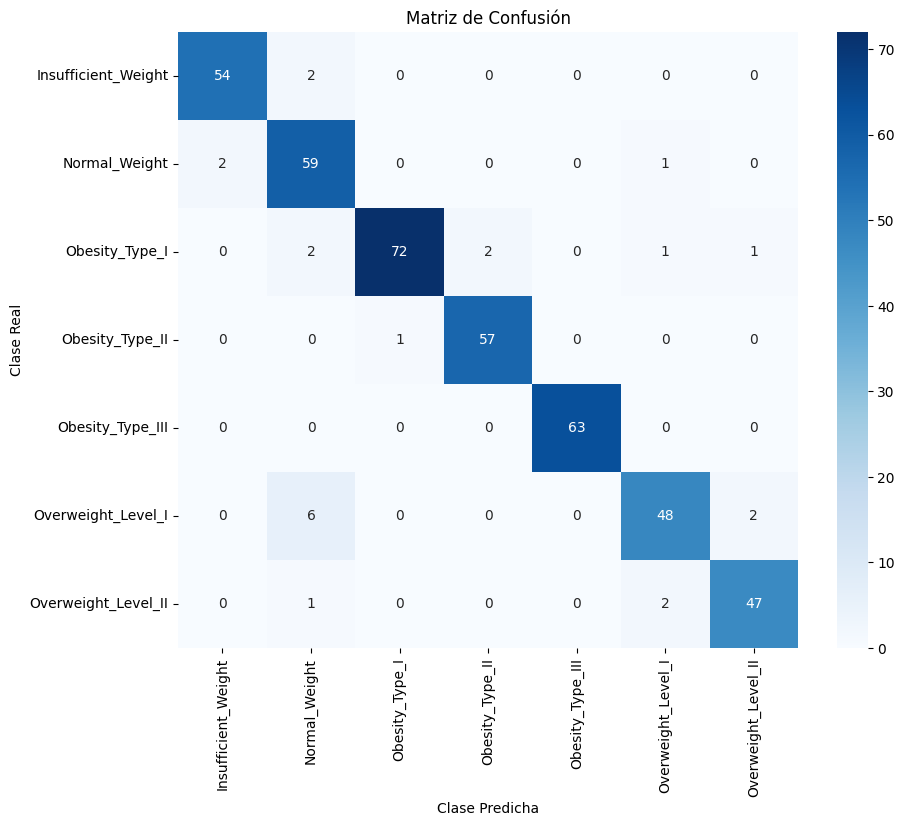

In [165]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

In [166]:
#curva ROC y calcular el AUC
# Crear variable binaria: 1 si es obesidad, 0 si no
import pandas as pd
import os

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'

if os.path.exists(ruta_del_archivo):
    df = pd.read_csv(ruta_del_archivo)
    df['Obeso'] = df['NObeyesdad'].apply(lambda x: 1 if 'Obesity' in x else 0)
    print("Dataset loaded and 'Obeso' column created successfully.")
else:
    print(f"Error: The file was not found at {ruta_del_archivo}")
    print("Please ensure the file is in your Google Drive and that Google Drive is mounted.")

Dataset loaded and 'Obeso' column created successfully.


In [167]:
X = df[['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']]
y = df['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_binario = RandomForestClassifier()
modelo_binario.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba_bin)
roc_auc = auc(fpr, tpr)

print(f"Area under the ROC Curve (AUC): {roc_auc:.2f}")

Area under the ROC Curve (AUC): 1.00


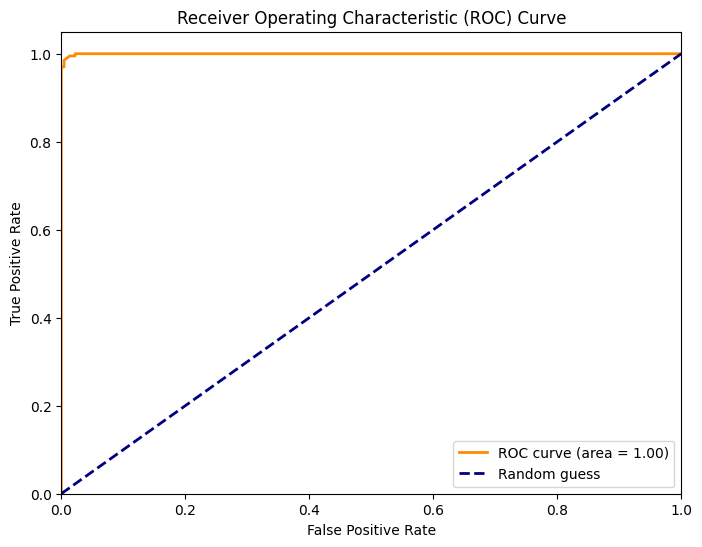

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) # Adjust ylim slightly for better visualization of the top
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Regresión Logística**

In [170]:
#regresión logística
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
try:
    df = pd.read_csv(ruta_del_archivo)
    print("Dataset loaded successfully.")

except FileNotFoundError:
    print(f"Error: The file was not found at {ruta_del_archivo}")
    print("Please ensure the file is in your Google Drive and that Google Drive is mounted.")

Dataset loaded successfully.


In [171]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar codificación One-Hot a las columnas categóricas y mantener las columnas numéricas
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)
df_encoded = preprocessor.fit_transform(df)

In [172]:
# Obtener los nombres de las características después de la codificación
onehot_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
passthrough_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
all_feature_names = list(onehot_feature_names) + passthrough_feature_names

In [173]:
# Convierte los datos codificados en un DataFrame de pandas
x = pd.DataFrame(df_encoded, columns=all_feature_names)

#Separar la variable de destino 'NObeyesdad' del DataFrame original
y = df['NObeyesdad']
print(y)

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object


In [174]:
#Las características 'x' serán todas las columnas en df_encoded excepto aquellas correspondientes a NObeyesdad
nobeyesdad_encoded_cols = [col for col in x.columns if col.startswith('NObeyesdad_')]
x = x.drop(columns=nobeyesdad_encoded_cols)

print("Forma de las características (x):", x.shape)
print("Forma de la variable objetivo (y):", y.shape)

Forma de las características (x): (2111, 31)
Forma de la variable objetivo (y): (2111,)


In [175]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80 % entrenamiento, 20 % prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Dimensiones del conjunto de entrenamiento (x_train, y_train):", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (x_test, y_test):", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (x_train, y_train): (1688, 31) (1688,)
Dimensiones del conjunto de prueba (x_test, y_test): (423, 31) (423,)


In [176]:
# Instanciar el modelo de regresión logística
model_lr = LogisticRegression(random_state=42, solver='liblinear')


# Entrena el modelo con los datos de entrenamiento
model_lr.fit(x_train, y_train)
print("Modelo de Regresión Logística entrenado correctamente.")


Modelo de Regresión Logística entrenado correctamente.


In [177]:
# Realizar predicciones con el conjunto de prueba
y_pred_lr = model_lr.predict(x_test)
print("Predicciones realizadas correctamente.")

Predicciones realizadas correctamente.


In [178]:
# Calcular la precisión
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Precisión del modelo de Regresión Logística: {accuracy_lr:.2f}")

Precisión del modelo de Regresión Logística: 0.73


In [179]:
# Generar informe de clasificación
print("\nReporte de clasificación del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))


Reporte de clasificación del modelo de Regresión Logística:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.96      0.89        56
      Normal_Weight       0.80      0.39      0.52        62
     Obesity_Type_I       0.68      0.63      0.65        78
    Obesity_Type_II       0.77      0.98      0.86        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.57      0.62      0.60        56
Overweight_Level_II       0.48      0.50      0.49        50

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.71       423
       weighted avg       0.73      0.73      0.71       423



In [180]:
# Calcular la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatriz de confusión del modelo de Regresión Logística:")
display(pd.DataFrame(conf_matrix_lr, index=model_lr.classes_, columns=model_lr.classes_))


Matriz de confusión del modelo de Regresión Logística:


,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Insufficient_Weight,54,0,0,0,0,2,0
Normal_Weight,12,24,3,0,1,13,9
Obesity_Type_I,0,2,49,14,3,3,7
Obesity_Type_II,0,0,1,57,0,0,0
Obesity_Type_III,0,0,0,0,63,0,0
Overweight_Level_I,0,3,5,1,1,35,11
Overweight_Level_II,0,1,14,2,0,8,25


Coeficientes del modelo de Regresión Logística por Clase:


,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Insufficient_Weight,-0.042522,1.191174,0.461969,0.686684,0.410168,0.738484,-1.246407,1.494128,0.686485,0.214446,...,0.315062,-0.084652,-0.079063,5.143013,-0.373706,0.976166,0.789776,0.517810,0.208170,0.497730
Normal_Weight,0.116204,0.989318,0.670447,0.435075,0.685330,0.420192,1.929979,-0.110417,-0.330311,-0.383730,...,-0.299514,1.299616,0.000958,0.544928,-0.065538,-0.228160,0.067046,-0.291880,0.226487,-0.221922
Obesity_Type_I,0.336097,0.091247,-0.612329,1.039674,-0.463069,0.890413,0.562735,-0.287925,1.045349,-0.892815,...,-0.119171,-0.362748,-0.008206,-2.535216,0.020992,-1.333498,-0.535428,0.472389,0.045885,-0.038125
Obesity_Type_II,-4.877854,2.578522,-1.293773,-1.005559,-0.870022,-1.429310,-0.599438,-1.492377,-0.159533,-0.047985,...,-0.637047,-0.524701,0.089248,-5.281994,0.171004,-0.093338,-0.299133,-1.559985,-0.374445,-0.458219
Obesity_Type_III,2.106945,-3.878074,-0.777677,-0.993452,-0.691165,-1.079964,-0.668283,-0.373552,-0.650212,-0.079082,...,-0.879490,-0.105280,-0.282727,-3.584988,0.163477,0.925969,0.505878,0.043684,-2.345808,-0.674940
Overweight_Level_I,0.079286,-0.056737,-0.317027,0.339576,-0.535278,0.557827,-0.702371,-1.425872,0.191490,1.959301,...,-0.378433,-0.203877,-0.014454,1.496986,-0.040065,-0.365232,-0.269458,0.227232,0.126305,-0.332619
Overweight_Level_II,-0.934912,0.141586,-1.200252,0.406926,0.479701,-1.273027,-0.747892,-0.160151,0.747619,-0.632903,...,0.449983,-0.471602,0.103901,0.599453,-0.030520,-0.375324,-0.380140,0.186043,-0.225505,0.368556


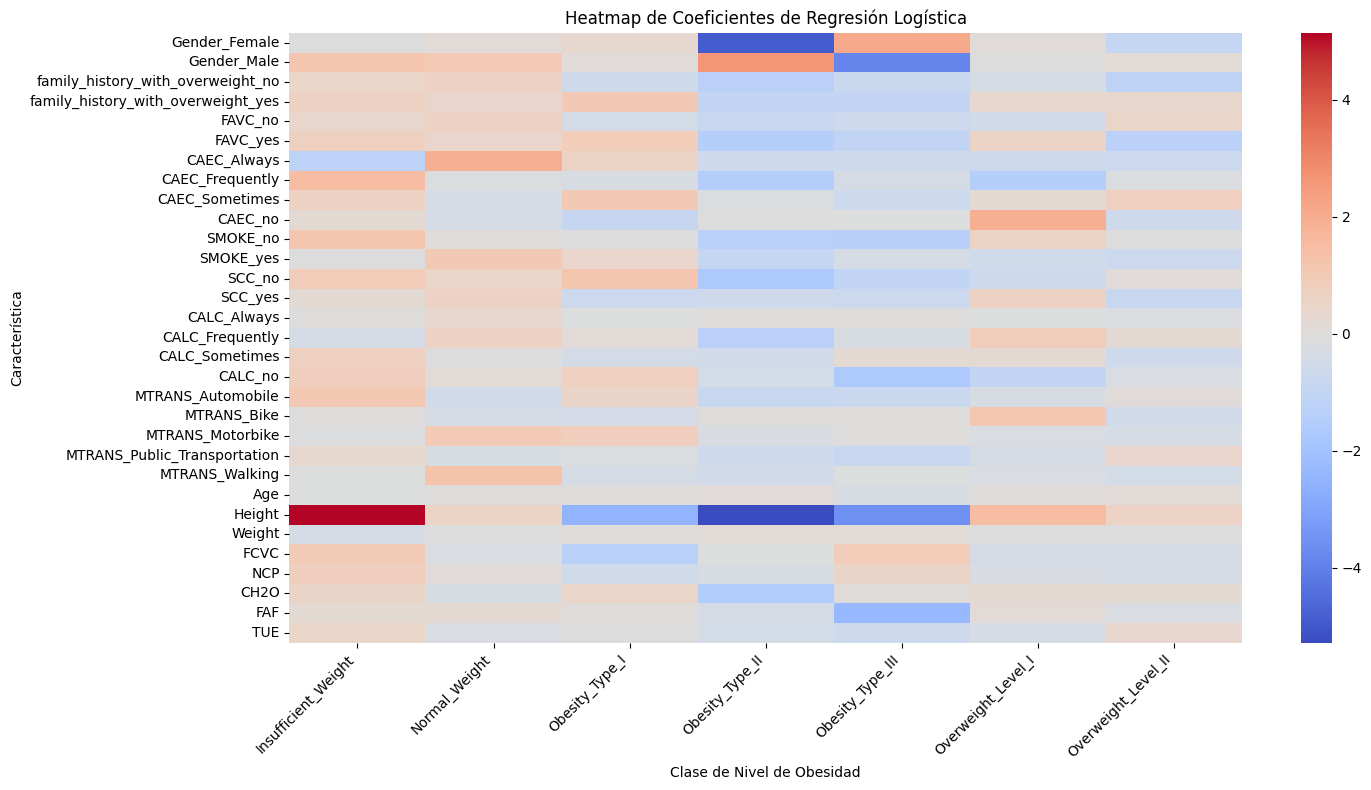

In [181]:
# Obtener los coeficientes del modelo y los nombres de las características
coefficients = model_lr.coef_
feature_names = x.columns # Usamos los nombres de las características del DataFrame codificado original 'x'
class_names = model_lr.classes_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame(coefficients, columns=feature_names, index=class_names)

print("Coeficientes del modelo de Regresión Logística por Clase:")
display(coef_df)

# Opcional: Visualizar los coeficientes (por ejemplo, con un heatmap)
# Esto puede ser útil si el número de características y clases no es demasiado grande
plt.figure(figsize=(15, 8))
sns.heatmap(coef_df.T, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Coeficientes de Regresión Logística')
plt.xlabel('Clase de Nivel de Obesidad')
plt.ylabel('Característica')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se solapen
plt.show()

**curvas ROC**

Area under the ROC Curve (AUC): 1.00


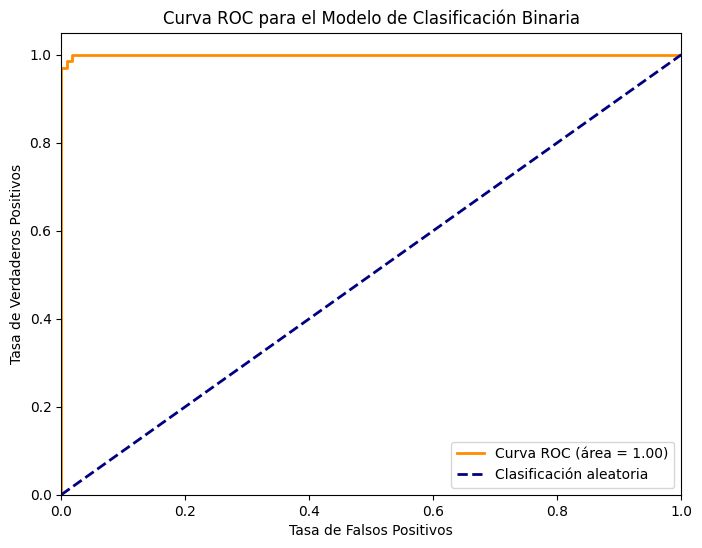

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Probabilidades de clase positiva usando el modelo binario
# Usar X_test que corresponde a los datos usados para entrenar modelo_binario
y_pred_proba_bin = modelo_binario.predict_proba(X_test)[:, 1]

# ROC y AUC usando la variable objetivo binaria (y_test_bin)
fpr_log, tpr_log, _ = roc_curve(y_test_bin, y_pred_proba_bin)
auc_log = auc(fpr_log, tpr_log)

print(f"Area under the ROC Curve (AUC): {auc_log:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Curva ROC (área = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificación aleatoria')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para el Modelo de Clasificación Binaria')
plt.legend(loc="lower right")
plt.show()

**Comparar curvas ROC**

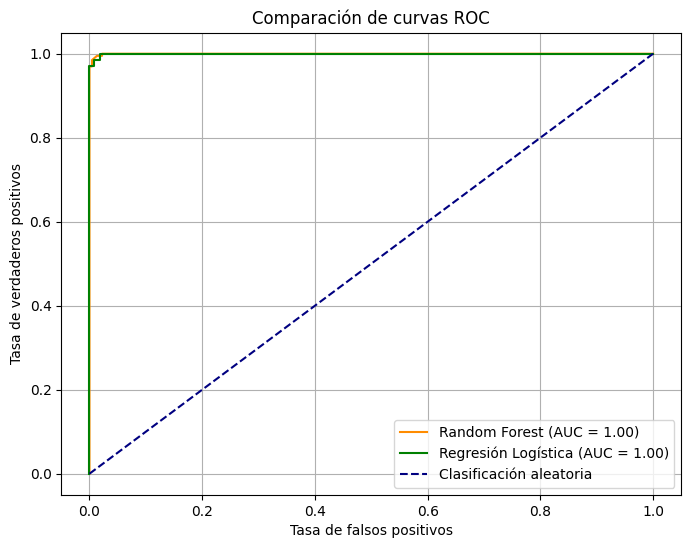

In [183]:
plt.figure(figsize=(8,6))

# Random Forest
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange')

# Regresión logística
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})', color='green')

# Línea aleatoria
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Clasificación aleatoria')

plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Comparación de curvas ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()